In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
import pandas_profiling

In [48]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/01_Bild.JPG)

In [49]:
houseprice = pd.read_csv('https://raw.githubusercontent.com/xpython21/Colab/main/Data/MAzure_pl/house_data.csv')
houseprice.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20635,1042700270,20140616T000000,852880.0,4,3.25,3450,6184,2.0,0,0,3,9,3450.0,0,2014,0,98074,47.6072,-122.054,3020,5369
18930,2979800762,20140904T000000,365000.0,3,2.50,1484,1761,3.0,0,0,3,7,1484.0,0,2003,0,98115,47.6844,-122.317,1484,4320
4558,423049067,20150205T000000,160000.0,2,1.00,930,7742,1.0,0,0,3,6,930.0,0,1933,0,98168,47.5070,-122.302,2240,8723
16144,7202271060,20150310T000000,610000.0,4,2.50,2980,5896,2.0,0,0,3,8,2980.0,0,2001,0,98053,47.6872,-122.036,2900,5712
8271,1703401110,20140807T000000,292000.0,2,1.00,880,5500,1.0,0,0,3,6,880.0,0,1904,0,98118,47.5573,-122.289,1080,5500
17770,1951800580,20141024T000000,590000.0,4,2.50,3700,12500,1.0,0,0,5,8,1920.0,1780,1973,0,98006,47.5403,-122.168,2020,8350
15205,7518505910,20141119T000000,528000.0,2,1.00,1260,5100,1.5,0,0,4,7,1120.0,140,1925,0,98117,47.6805,-122.384,1260,5100
10755,4038300070,20141113T000000,400000.0,3,1.50,1510,8360,1.0,0,0,3,7,1120.0,390,1960,0,98007,47.6119,-122.133,1700,8360
601,3211230260,20150204T000000,399950.0,4,2.00,2420,31465,1.0,0,0,3,9,2420.0,0,1984,0,98092,47.3131,-122.115,2560,32186
20079,7436700090,20140529T000000,449950.0,4,2.75,2320,4344,2.0,0,0,3,8,2320.0,0,2012,0,98059,47.4862,-122.163,2310,3770


In [50]:
print("Der Datensatz enthält {} Zeilen und {} Spalten".format(houseprice.shape[0], houseprice.shape[1]))

Der Datensatz enthält 21613 Zeilen und 21 Spalten


![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/02_1_Bild.JPG)
![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/02_2_Bild.JPG)

In [51]:
houseprice.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [52]:
profile = pandas_profiling.ProfileReport(houseprice, title="House Data Profiling Report", explorative=True)

In [53]:
profile.to_file('/content/sample_data/House_Data_Profiling_Report.html')

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/03_Bild.JPG)

In [54]:
houseprice = houseprice.drop(["id", "date", "zipcode", "lat", "long"], axis=1)

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/04_1_Bild.JPG)
![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/04_2_Bild.JPG)

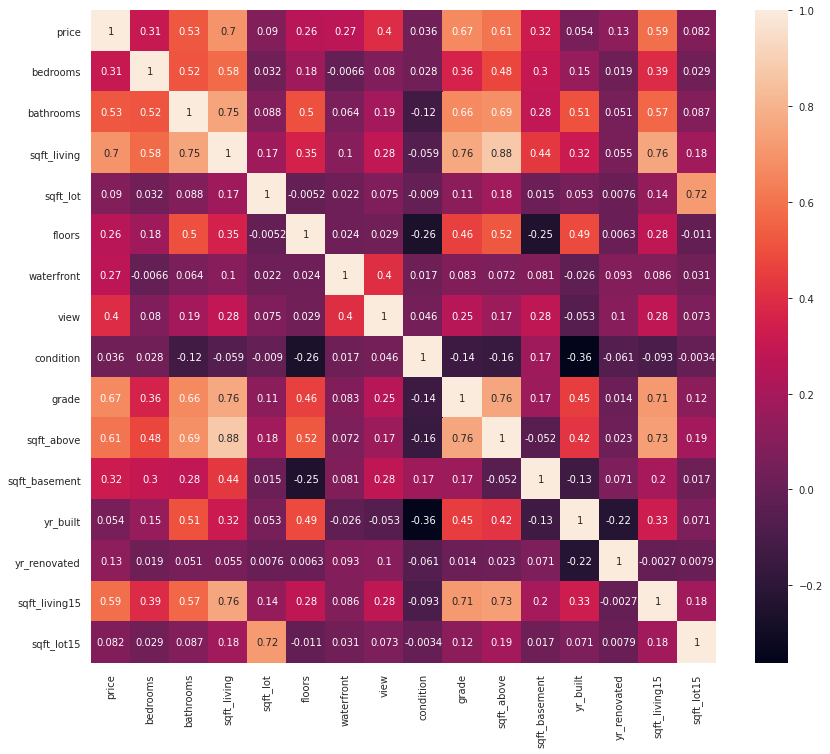

In [55]:
plt.figure(figsize=(14, 12))

linCorrelation = houseprice.corr()
sns.heatmap(linCorrelation, annot=True)
plt.show()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/05_Bild.JPG)

In [56]:
houseprice.loc[houseprice['yr_renovated'] > 1, 'yr_renovated'] = 1

In [57]:
houseprice[['yr_renovated']].head()

,yr_renovated
0,0
1,1
2,0
3,0
4,0


![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/06_Bild.JPG)

In [58]:
houseprice = houseprice.dropna()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/07_Bild.JPG)

In [59]:
houseprice.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [60]:
col_names = ["waterfront", "view", "yr_renovated"]

for col in col_names:
  houseprice[col] = houseprice[col].astype("category", copy=False)

In [61]:
houseprice.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/08_Bild.JPG)

In [62]:
houseprice['yr_renovated'] = pd.get_dummies(houseprice['yr_renovated'])

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/09_Bild.JPG)


In MAMLS the label is defined at the "Train Model" module

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/10_Bild.JPG)

In [63]:
y = houseprice['price']
X = houseprice.drop('price', axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
X_train.shape, y_train.shape

((17288, 15), (17288,))

In [66]:
X_test.shape, y_test.shape

((4323, 15), (4323,))

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/11_Bild.JPG)

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/10_Bild.JPG)

In [67]:
linreg = LinearRegression()

In [68]:
reg = linreg.fit(X_train, y_train)

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/13_Bild.JPG)

In [69]:
y_pred = reg.predict(X_test).round()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/13_1l_Bild.JPG)![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/13_2l_Bild.JPG)

In [70]:
price_comparison = pd.DataFrame(
    {
      'actualPrice': y_test,
      'predictedPrice': y_pred
    }
)

price_comparison.head(10)

,actualPrice,predictedPrice
14113,219950.0,321460.0
18791,1700000.0,1713642.0
20049,580000.0,936895.0
13063,338950.0,345315.0
1074,515000.0,476712.0
19992,619000.0,396726.0
9716,489000.0,266324.0
9313,790000.0,911080.0
11682,205000.0,295707.0
21483,407500.0,429297.0


In [71]:
price_comparison['rel_delta'] = price_comparison['predictedPrice'] - price_comparison['actualPrice']
price_comparison['abs_delta'] = (price_comparison['predictedPrice'] - price_comparison['actualPrice']) / price_comparison['actualPrice']

In [72]:
price_comparison.reset_index(drop=True, inplace=True)
price_deltas = price_comparison[['rel_delta', 'abs_delta']]

price_deltas

,rel_delta,abs_delta
0,101510.0,0.461514
1,13642.0,0.008025
2,356895.0,0.615336
3,6365.0,0.018779
4,-38288.0,-0.074346
...,...,...
4318,-48377.0,-0.133823
4319,389354.0,1.287972
4320,93788.0,0.293088
4321,-299445.0,-0.504116


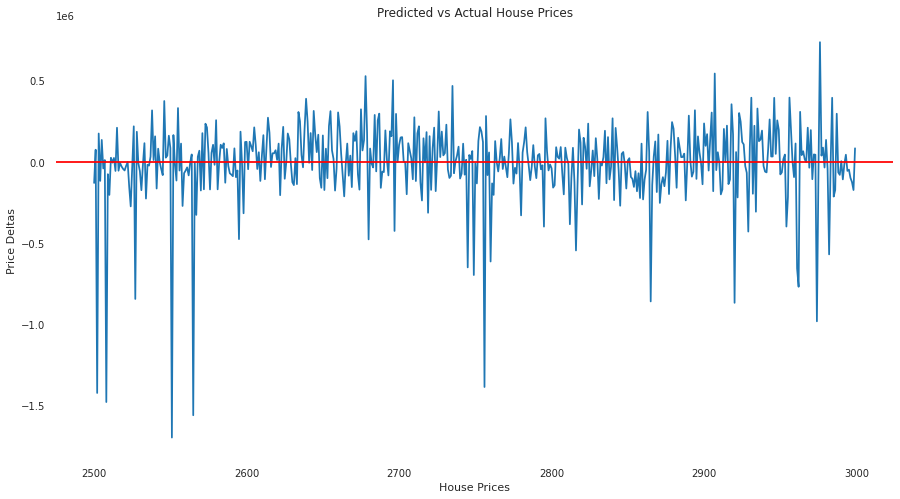

In [74]:
plt.figure(figsize=(15, 8))

plt.plot(price_comparison['rel_delta'][2500:3000])
plt.axhline(y=0, color='r')

plt.xlabel('House Prices')
plt.ylabel('Price Deltas')

plt.title('Predicted vs Actual House Prices')

plt.show()

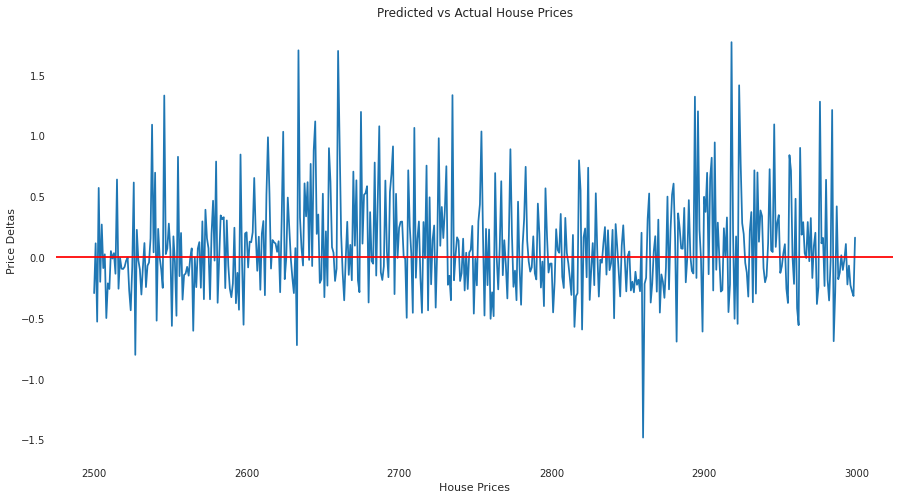

In [75]:
plt.figure(figsize=(15, 8))

plt.plot(price_comparison['abs_delta'][2500:3000])
plt.axhline(y=0, color='r')

plt.xlabel('House Prices')
plt.ylabel('Price Deltas')

plt.title('Predicted vs Actual House Prices')

plt.show()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/14_Bild.JPG)

In [ ]:
reg.score(X_test, y_test)

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/15_Bild.JPG)